# Task 2: Predictive Analysis

Alex Rivera ID#011243153

Western Governors University

D209 - Data Mining  I 

October 06, 2023

## A1: Proposal Of Question

The research question for this project is, "Can the random forest method significantly predict customer tenure?"

## A2: Defined Goal

The main goal of this analysis is to see if a random forest algorithm can significantly predict a telecom company's customer's tenure. Also, identify the features of importance that significantly impact tenure. The insights from the predicted tenure and features will allow for the company to implement strategies to prevent customers at risk of churning. 

## B1: Explanation Of Prediction  Method

The random forest algorithm is derived from the decision trees algorithm. The random forest algorithm can be used for classification and regressions so the application of this algorithm can be wide. The random forest algorithm consists of the output of multiple decision trees and the concept of ensemble learning which combines multiple classifiers to improve the performance of the model (M, 2023). A classifier contains training data along with different values to create different decision tree models. The expected outcome of the random forest algorithm is an average of the prediction that reduced overfitting and higher accuracy versus a single decision tree(M, 2023). 

## B2: Summary Of Method Assumption

The main assumption for the random forest algorithm according to Shruti M is, "There should be some actual values in the feature variables of the dataset, which will give the classifier a better chance to predict accurate results, rather than provide an estimation (M, 2023)." While the algorithm reduces variance through bagging or subsampling of the data it is still subsetilble to the underlying dataset. 

## B3: Packages Or Libraries List

D209 Task 1 explanations and coding were referenced and adjusted as needed for the random forest analysis below (Rivera, 2023).

* **Pandas** library will be used for data manipulation and analysis throughout the project. 
    * CategoricalDtype Pandas class will be used for converting data types to categorical. 
* **Numpy** library will be used for working with arrays and data analysis throughout the project. 
* **Matplotlib** will used for visualizing the series of features importances. 
* **Sklearn** is a machine learning library that will be used to implement random forest regression.  
    * train_test_split Sklearn class will be used for splitting the data into training and testing datasets. 
    * RandomForestRegressor Sklearn class will be used for implementing the random forest model. 
    * GridSearchCV Sklearn class will be used for running through parameters to find the best parameter.
    * r2_score Sklearn class will be used for computing the coefficient of determination.
    * mean_squared_error Sklearn class will be used for computing the mean squared error regression loss.
* **Statsmodels** library will used to check for multicollinearity while creating the random forest model. 

In [1]:
#Importing necessary packages for the Random Forest Analysis project 
import pandas as pd 
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

## C1: Data Preprocessing

One common preprocessing task done throughout D209 is one hot encoding. D209 Task 1 was referenced for this portion as it still was implemented in the analysis, differences for dropping the first variable while encoding were highlighted(Rivera, 2023): 

    Ganji's article went over the reasons for implementing it, "One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model"(Ganji, 2023). Since machine learning models take in numerical data all categorical data needs to be converted to either 0 or 1. For binary categorical data, this encoding was straightforward by implementing the following function to the dataframe replace('Yes', 1) and replace('No', 0). For categorical data with more than two steps creating dummies for each category was necessary. For example, the get_dummies(data=rf_churn["gender"] drop_first=True) allowed the gender categorical variables to create two separate columns for Male_Gender, Female_Gender, and Nonbinary_Gender all with numerical data. All new columns were inserted into the new dataframe and the original variable nonnumerical was dropped, this data can now be implemented into the random forest algorithm method. 

## C2: Data Set Variables

* Continuous: Tenure
* Categorical: Area
* Continuous: Children
* Continuous: Age
* Continuous: Income
* Categorical: Marital
* Categorical: Gender
* Categorical: Churn
* Categorical: Outage_sec_perweek
* Continuous: Email
* Continuous: Contacts
* Continuous: Yearly_equip_failure
* Categorical: Techie
* Categorical: Port_modem
* Categorical: Tablet
* Categorical: InternetService
* Categorical: Phone
* Categorical: Multiple
* Categorical: OnlineSecurity
* Categorical: OnlineBackup
* Categorical: DeviceProtection
* Categorical: TechSupport
* Categorical: StreamingTV
* Categorical: StreamingMovies
* Continuous: MonthlyCharge
* Continuous: Bandwidth_GB_Year

## C3: Steps For Analysis

D209 Task 1 explanations and coding were referenced and adjusted as needed for the random forest analysis below (Rivera, 2023).

#### Loading the churn dataset flat file into a pandas dataframe and running info() for an overview.

In [2]:
churn = pd.read_csv('C:/Users/alexa/WGU/D209/Project/churn_clean.csv', index_col=0)

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

#### Setting options to view max columns for review during data cleaning and viewing dataframe.

In [3]:
pd.set_option("display.max_columns", None)

churn

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


#### Detecting duplicates and checking if Customer_id is unique. 

In [4]:
print(churn.duplicated().value_counts())

churn['Customer_id'].is_unique

False    10000
dtype: int64


True

#### Detecting null values in the dataframe.

In [5]:
churn.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

#### Running a block of code to change column types to categorical or boolean and replace text to match the dataset dictionary. 

In [6]:
churn["Area"] = churn["Area"].astype("category")
churn.TimeZone.replace({
    "America/Anchorage" : "Alaska Time Zone",
    "America/Juneau" : "Alaska Time Zone",
    "America/Nome" : "Alaska Time Zone",
    "America/Sitka" : "Alaska Time Zone",
    "America/Puerto_Rico" : "Atlantic Time Zone",
    "America/Chicago" : "Central Time Zone",
    "America/Indiana/Knox" : "Central Time Zone",
    "America/Indiana/Tell_City" : "Central Time Zone",
    "America/Menominee" : "Central Time Zone",
    "America/North_Dakota/New_Salem" : "Central Time Zone",
    "America/Detroit" : "Eastern Time Zone",
    "America/Indiana/Indianapolis" : "Eastern Time Zone",
    "America/Indiana/Marengo" : "Eastern Time Zone",
    "America/Indiana/Petersburg" : "Eastern Time Zone",
    "America/Indiana/Vincennes" : "Eastern Time Zone",
    "America/Indiana/Winamac" : "Eastern Time Zone",
    "America/Kentucky/Louisville" : "Eastern Time Zone",
    "America/New_York" : "Eastern Time Zone",
    "America/Toronto" : "Eastern Time Zone",
    "Pacific/Honolulu" : "Hawaii-Aleutian Time Zone",
    "America/Boise" : "Mountain Time Zone",
    "America/Denver" : "Mountain Time Zone",
    "America/Ojinaga" : "Mountain Time Zone",
    "America/Phoenix" : "Mountain Time Zone",
    "America/Los_Angeles" : "Pacific Time Zone"
    }, inplace=True)
churn["TimeZone"] = churn["TimeZone"].astype("category")
churn["Marital"] = churn["Marital"].astype("category")
churn.Gender.replace("Prefer not to answer","Nonbinary", inplace=True)
churn["Gender"] = churn["Gender"].astype("category")
churn["InternetService"] = churn["InternetService"].astype("category")
churn["PaymentMethod"] = churn["PaymentMethod"].astype("category")
churn["Item1"] = churn["Item1"].astype("category")
churn["Item2"] = churn["Item2"].astype("category")
churn["Item3"] = churn["Item3"].astype("category")
churn["Item4"] = churn["Item4"].astype("category")
churn["Item5"] = churn["Item5"].astype("category")
churn["Item6"] = churn["Item6"].astype("category")
churn["Item7"] = churn["Item7"].astype("category")
churn["Item8"] = churn["Item8"].astype("category")

#### Renaming survey coulmns appropriately.

In [7]:
churn.rename(columns={
    'Item1' : 'timely_response',
    'Item2' : 'timely_fixes',
    'Item3' : 'timely_replacements',
    'Item4' : 'reliability',
    'Item5' : 'options',
    'Item6' : 'respectful_response',
    'Item7' : 'courteous_exchange',
    'Item8' : 'evidence_of_active_listening'
}, inplace=True)

#### Creating dataframe with variables needed for analysis and reviewing dataframe. 

In [8]:
rf_churn = churn[["Tenure","Area","Children","Age","Income","Marital","Gender","Churn","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Tablet","InternetService","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MonthlyCharge","Bandwidth_GB_Year"]]

rf_churn

,Tenure,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6.795513,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,172.455519,904.536110
2,1.156681,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,242.632554,800.982766
3,15.754144,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,159.947583,2054.706961
4,17.087227,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,119.956840,2164.579412
5,1.670972,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,68.197130,Rural,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,159.979400,6511.252601
9997,61.040370,Rural,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,207.481100,5695.951810
9998,47.416890,Rural,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,169.974100,4159.305799


#### Reviewing descriptive statistics of Tenure.

In [9]:
rf_churn["Tenure"].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

#### Finding and replacing yes/no values to 1/0. 

In [10]:
#Article refernced for code (Moffitt, 2017)
rf_churn = rf_churn.replace('Yes', 1)
rf_churn = rf_churn.replace('No', 0)

#### Creating dummies for Area, Marital, Gender, and Internet Service.

In [11]:
#Article referenced for code (Ebner, 2022) 
Area = pd.get_dummies(data=rf_churn["Area"], drop_first=True)

Area.rename(columns={"Suburban": "Suburban_Area","Urban": "Urban_Area"}, inplace = True)

#Article referenced for code (Ebner, 2022) 
Marital = pd.get_dummies(data=rf_churn["Marital"], drop_first=True)

Marital.rename(columns={"Married": "Married_Martial", "Never Married":"Never_Married_Martial", "Separated":"Separated_Martial", "Widowed":"Widowed_Martial"}, inplace = True)

#Article referenced for code (Ebner, 2022) 
Gender = pd.get_dummies(data=rf_churn["Gender"], drop_first=True)

Gender.rename(columns={"Male": "Male_Gender", "Nonbinary":"Nonbinary_Gender"}, inplace = True)

#Article referenced for code (Ebner, 2022) 
InternetService = pd.get_dummies(data=rf_churn["InternetService"], drop_first=True)

InternetService.rename(columns={"Fiber Optic": "Internet_Fiber_Optic", "None":"Internet_None"}, inplace = True)

#### Inserting dummy values into dataframe and dropping original non-dummies columns.

In [12]:
#Inserting Area dummies into regress_churn dataframe
rf_churn.insert(2, "Suburban_Area", Area.Suburban_Area)
rf_churn.insert(2, "Urban_Area", Area.Urban_Area)

#Inserting Marital dummies into regress_churn dataframe
rf_churn.insert(2, "Married_Martial", Marital.Married_Martial)
rf_churn.insert(2, "Never_Married_Martial", Marital.Never_Married_Martial)
rf_churn.insert(2, "Separated_Martial", Marital.Separated_Martial)
rf_churn.insert(2, "Widowed_Martial", Marital.Widowed_Martial)

#Inserting Gender dummies into regress_churn dataframe
rf_churn.insert(2, "Male_Gender", Gender.Male_Gender)
rf_churn.insert(2, "Nonbinary_Gender", Gender.Nonbinary_Gender)

#Inserting Internet Service dummies into regress_churn dataframe
rf_churn.insert(2, "Internet_Fiber_Optic", InternetService.Internet_Fiber_Optic)
rf_churn.insert(2, "Internet_None", InternetService.Internet_None)

#Dropping original non-dummies columns 
rf_churn.drop(columns=['Area'],inplace=True)
rf_churn.drop(columns=['Marital'],inplace=True)
rf_churn.drop(columns=['Gender'],inplace=True)
rf_churn.drop(columns=['InternetService'],inplace=True)

rf_churn

,Tenure,Internet_None,Internet_Fiber_Optic,Nonbinary_Gender,Male_Gender,Widowed_Martial,Separated_Martial,Never_Married_Martial,Married_Martial,Urban_Area,Suburban_Area,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6.795513,0,1,0,1,1,0,0,0,1,0,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,172.455519,904.536110
2,1.156681,0,1,0,0,0,0,0,1,1,0,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,242.632554,800.982766
3,15.754144,0,0,0,0,1,0,0,0,1,0,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,159.947583,2054.706961
4,17.087227,0,0,0,1,0,0,0,1,0,1,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,119.956840,2164.579412
5,1.670972,0,1,0,1,0,1,0,0,0,1,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,68.197130,0,0,0,1,0,0,0,1,0,0,3,23,55723.74,0,9.415935,12,2,0,0,1,1,1,1,0,1,1,0,0,0,159.979400,6511.252601
9997,61.040370,0,1,0,1,0,0,0,0,0,0,4,48,34129.34,0,6.740547,15,2,0,0,0,0,1,1,1,1,1,0,1,0,207.481100,5695.951810
9998,47.416890,0,1,0,0,0,0,1,0,0,0,1,48,45983.43,0,6.590911,10,0,0,0,0,0,1,1,1,1,0,0,0,0,169.974100,4159.305799


#### Checking for multicollinearity VIF >10. 

In [13]:
#Episode 1 coding was referenced (Sewell, 2023)
# Assign values to X for all predictor features
# Assign values to y for the dependent variable
X = rf_churn.drop(["Tenure"],1)
y = rf_churn["Tenure"]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

C:\Users\alexa\AppData\Local\Temp\ipykernel_10144\3400298580.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = rf_churn.drop(["Tenure"],1)


                  feature         VIF
0           Internet_None    1.700526
1    Internet_Fiber_Optic    3.785430
2        Nonbinary_Gender    1.047640
3             Male_Gender    1.938464
4         Widowed_Martial    1.942977
5       Separated_Martial    1.937610
6   Never_Married_Martial    1.905544
7         Married_Martial    1.893518
8              Urban_Area    1.985360
9           Suburban_Area    1.989063
10               Children    1.940566
11                    Age    7.307110
12                 Income    2.962014
13                  Churn    2.338286
14     Outage_sec_perweek   11.454649
15                  Email   15.126906
16               Contacts    2.005143
17   Yearly_equip_failure    1.390271
18                 Techie    1.211573
19             Port_modem    1.927335
20                 Tablet    1.427869
21                  Phone   10.000010
22               Multiple    4.918051
23         OnlineSecurity    1.593853
24           OnlineBackup    3.316161
25       Dev

#### Checking for multicollinearity VIF >10, elimated Outage_sec_perweek, Email, Phone and MonthlyCharge.

In [14]:
#Episode 1 coding was referenced (Sewell, 2023)
# Assign values to X for all predictor features
X = X[["Internet_None","Internet_Fiber_Optic","Nonbinary_Gender","Male_Gender","Widowed_Martial","Separated_Martial","Never_Married_Martial","Married_Martial","Urban_Area","Suburban_Area","Children","Age","Income","Churn","Contacts","Yearly_equip_failure","Techie","Port_modem","Tablet","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                  feature       VIF
0           Internet_None  1.568602
1    Internet_Fiber_Optic  2.175711
2        Nonbinary_Gender  1.045094
3             Male_Gender  1.890756
4         Widowed_Martial  1.831471
5       Separated_Martial  1.819888
6   Never_Married_Martial  1.796290
7         Married_Martial  1.776731
8              Urban_Area  1.915877
9           Suburban_Area  1.908463
10               Children  1.888968
11                    Age  5.961618
12                 Income  2.796415
13                  Churn  2.244687
14               Contacts  1.950943
15   Yearly_equip_failure  1.377883
16                 Techie  1.205587
17             Port_modem  1.883381
18                 Tablet  1.410857
19               Multiple  1.870150
20         OnlineSecurity  1.535568
21           OnlineBackup  1.812426
22       DeviceProtection  1.764543
23            TechSupport  1.575777
24            StreamingTV  2.180970
25        StreamingMovies  2.273775
26      Bandwidth_GB_Year  4

## C4: Cleaned Data Set

The RF_Prepared_Data CSV was submitted along with the project as requested in the rubric. 

In [15]:
#Creating dataframe for saving prepared dataset
rf_churn_save = X.copy()

rf_churn_save.insert(0, column="Tenure", value=y.reset_index().drop('CaseOrder', axis=1))

#Save prepared RF dataset to CSV 
rf_churn_save.to_csv('C:/Users/alexa/WGU/D209/Project/Task2/RF_Prepared_Data.csv', index=False)

## D1: Splitting The Data

The X_train_Data, X_test_Data, y_train_Data, y_test_Data CSV files were submitted along with the project as requested in the rubric.

In [16]:
#Splitting the data 80% / 20% (Elleh, 2023)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

#Save training and test files to provide 
X_train.to_csv('C:/Users/alexa/WGU/D209/Project/Task2/X_train_Data.csv', index=False)
X_test.to_csv('C:/Users/alexa/WGU/D209/Project/Task2/X_test_Data.csv', index=False)
y_train.to_csv('C:/Users/alexa/WGU/D209/Project/Task2/y_train_Data.csv', index=False)
y_test.to_csv('C:/Users/alexa/WGU/D209/Project/Task2/y_test_Data.csv', index=False)

## D2: Output And Intermediate Calculations

Previous sections covered cleaning, preprocessing, and hot encoding the categorical variables into dummy variables. The dataset is now prepared for analysis it will be split into an 80% training set and a 20% test set. Task 1 Cohort 2 gave a detailed breakdown of implementing the random forest model which was referred for the analysis (Elleh, 2023). Building out the random forest regression model is implemented with the Sklearn library and the RandomForestRegressor() class. The hyperparameters will be selected with the GridSearchCV() class. GridSearchCV performs the hyperparameter tuning by identifying the best parameters of the ones fed into the model n_estimators[10,50,100], max_features[2,3,4,5,6,7,8], and max_depth [8, None]. The best parameters chosen were n_estimators[100], max_features[8], and max_depth [None]. Best_score_ class from GridSearchCV was able to print out the MSE training score of 0.9914803936091359 and the RMSE training score of 0.9957310849868732. GridSearchCV metrics() class provided useful analytical outputs: 

- Training - R-squared score for the model:  0.9988351329384846
- Testing - Mean squared error for the model:  5.429195398883373
- Testing - Root Mean squared error for the model:  2.3300633894560407
- Testing - R-squared score for the model:  0.9920813835600192

The scores will be discussed in detail in section E1. Finally best_estimator_ class provides the important features that assisted in predicting customer tenure in the analysis. 

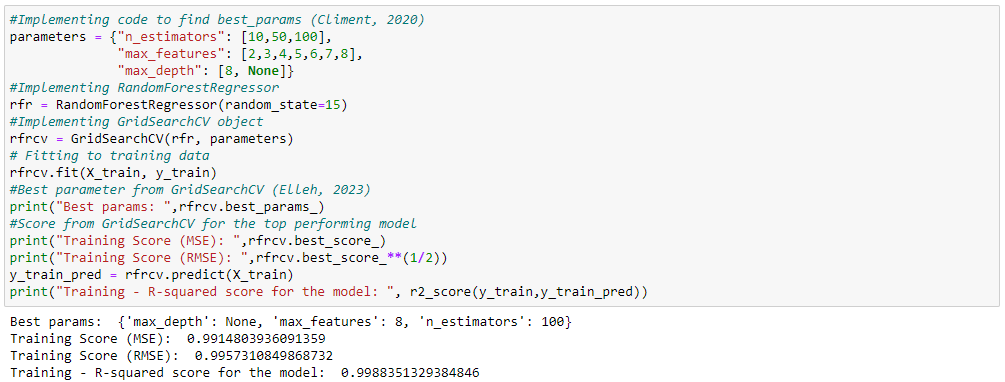

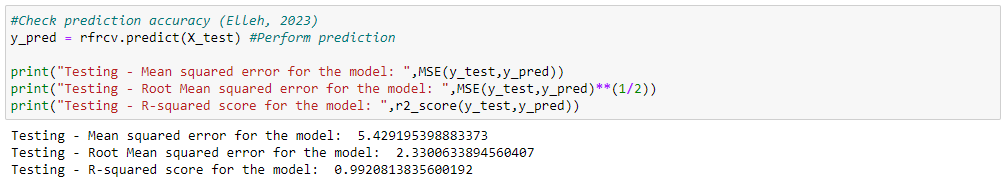

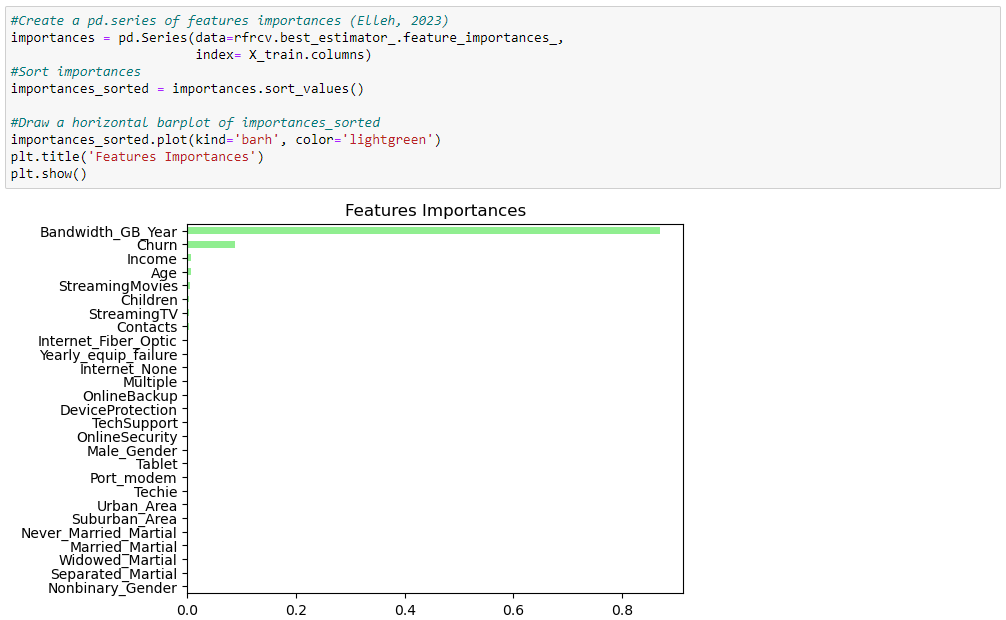

## D3: Code Execution

In [18]:
#Implementing RandomForestRegressor
rfr = RandomForestRegressor(random_state=15)
#Implementing code to find best_params (Climent, 2020)
parameters = {#"n_estimators": [10,50,100], commented out as parameters were already selected
              #"max_features": [2,3,4,5,6,7,8], commented out as parameters were already selected
              #"max_depth": [8, None] commented out as parameters were already selected
             "n_estimators": [100],
              "max_features": [8],
              "max_depth": [None]}
#Implementing GridSearchCV object
rfrcv = GridSearchCV(rfr, parameters)
# Fitting to training data
rfrcv.fit(X_train, y_train)
#Best parameter from GridSearchCV (Elleh, 2023)
print("Best params: ",rfrcv.best_params_)
#Score from GridSearchCV for the top performing model
print("Training Score (MSE): ",rfrcv.best_score_)
print("Training Score (RMSE): ",rfrcv.best_score_**(1/2))
y_train_pred = rfrcv.predict(X_train)
print("Training - R-squared score for the model: ", r2_score(y_train,y_train_pred))

Best params:  {'max_depth': None, 'max_features': 8, 'n_estimators': 100}
Training Score (MSE):  0.9914803936091359
Training Score (RMSE):  0.9957310849868732
Training - R-squared score for the model:  0.9988351329384846


In [19]:
#Check prediction accuracy (Elleh, 2023)
y_pred = rfrcv.predict(X_test) #Perform prediction

print("Testing - Mean squared error for the model: ",MSE(y_test,y_pred))
print("Testing - Root Mean squared error for the model: ",MSE(y_test,y_pred)**(1/2))
print("Testing - R-squared score for the model: ",r2_score(y_test,y_pred))

Testing - Mean squared error for the model:  5.429195398883373
Testing - Root Mean squared error for the model:  2.3300633894560407
Testing - R-squared score for the model:  0.9920813835600192


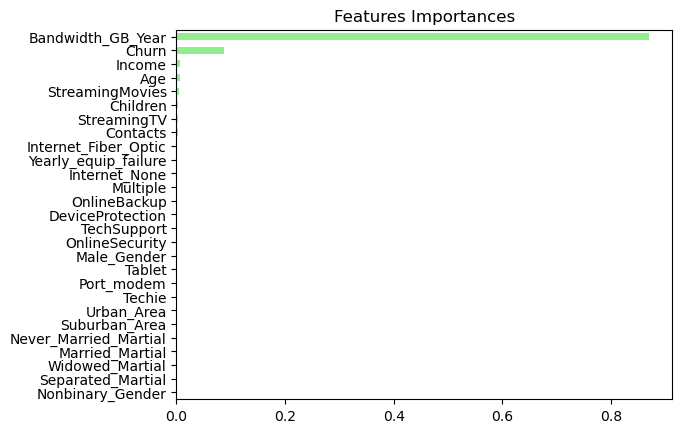

In [20]:
#Create a pd.series of features importances (Elleh, 2023)
importances = pd.Series(data=rfrcv.best_estimator_.feature_importances_,
                        index= X_train.columns)
#Sort importances
importances_sorted = importances.sort_values()

#Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## E1: Accuracy And MSE

To discuss the accuracy of the random forest regression algorithm the following metrics will used Mean squared error (**MSE**), Root Mean squared error (**RMSE**), and **R-squared** score. Gupta's article highlighted an example and the following definition, "Mean squared error is an evaluation metric that is used to calculate the average squared difference between the actual value and the predicted value" (Gupta, 2022). The interpretation of the score is the closer the value of MSE to 0, the better the prediction of the model. 

- Training - Mean squared error (**MSE**) for the model:  0.9914803936091359
- Testing - Mean squared error (**MSE**) for the model:  5.429195398883373

The D209 Task 2 material is defined as, "the square root of the average squared distance between the actual score and the predicted score" (Elleh, 2023). Below are the Root Mean squared error for training and testing:

- Training - Root Mean squared error (**RMSE**) for the model:  0.9957310849868732
- Testing - Root Mean squared error (**RMSE**) for the model:  2.3300633894560407

Below are the squared scores for training and testing, they range from 0-1. The higher the R-squared the better the model fits (Elleh, 2023). 

- Training - **R-squared** score for the model:  0.9988351329384846
- Testing - **R-squared** score for the model:  0.9920813835600192

## E2: Results And Implications

The analysis implemented the random forest regression algorithm, it was quick and efficient to run compared to previous algorithms. The random forest model had an accuracy of 99.2%, this is an impressive prediction score. The Root Mean squared score was 2.33. Hyperparameter tuning was implemented with GridSearchCV and the following values were found to best parameters: n_estimators[100], max_features[8], and max_depth [None]. Having minimal knowledge of hypertuning, there's a possibility of different parameter ranges to feed into GridSearchCV that could lead to other optimal values chosen. The process of implementing the model could be improved by the use of SelectKBest for feature selection, this was not implemented as I did not see on the rubric. 

## E3: Limitation

The major limitation of the random forest regression model comes from averaging the predictions based on previous values found in the dataset. While this makes the algorithm easy and efficient to implement the drawback is that cannot make predictions that differ from the dataset that the algorithm has previously seen. Using random forest as a classification model might also be optimal for the reason previously mentioned. 

## E4: Course Of Action

The metrics of the analysis allow me to answer the project question, "Can the random forest method significantly predict customer tenure?" With a score of 99.2%, yes the model can significantly predict customer tenure. The telecom company should implement this model to build a strategy on customer tenure and churn once the following has been reviewed. First, review the impact of feature selection ahead of running the model. Second,  continue to hypertune the parameter ranges to find the optimal values. 

## F: Panopto Recording
 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0c7e46b0-a38c-4aeb-865f-b094006c2107

## G: Sources For Third-Party Code

Climent, C. (2020, November 15). Random Forest Regressor and GridSearch. Kaggle. https://www.kaggle.com/code/carloscliment/random-forest-regressor-and-gridsearch 

Ebner, J. (2022, March 29). How to use pandas get dummies in python. Sharp Sight. https://www.sharpsightlabs.com/blog/pandas-get-dummies/ 

Elleh, F. (2023, August). D209 Data Mining 1 Task 1 Cohort. my.wgu.edu. Retrieved September 16, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D209/Student%20Facing%20Resources/D209%20Data%20Mining%201%20Task%201%20Cohort.pptx?d=w945f58a7b99e4d7abec09bb216b4d2bd&csf=1&web=1&e=0f7fEe

Elleh, F. (2023, August). D209 Data Mining 1 Task 2 Cohort. my.wgu.edu. Retrieved October 02, 2023, from
https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D209/Student%20Facing%20Resources/D209%20Data%20Mining%201%20Task%202%20Cohort.pptx?d=w4b73ab4767cb4e1fabf933fab2b3e26f&csf=1&web=1&e=7aHLk8

Moffitt, C. (2017, February 6). Guide to encoding categorical values in&nbsp;python. Practical Business Python Atom. https://pbpython.com/categorical-encoding.html 

Rivera, Alex. (2023). Task 1: Classification Analysis. Unpublished manuscript, Western Governors University.

Rivera, Alex. (2023). Task 2: Logistic Regression Modeling. Unpublished manuscript, Western Governors University.

Sewell, W. (2023a, July). D208 predictive modeling webinar - Episode 1. my.wgu.edu. Retrieved August 27, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Sewell%20D208_Predictive_Modeling_Webinar_Episode%201t.pptx?d=w285c378f808947589abe29976d079b56&amp;csf=1&amp;web=1&amp;e=EDZkfD. 


## H: Sources

Elleh, F. (2023, August). D209 Data Mining 1 Task 2 Cohort. my.wgu.edu. Retrieved October 02, 2023, from
https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D209/Student%20Facing%20Resources/D209%20Data%20Mining%201%20Task%202%20Cohort.pptx?d=w4b73ab4767cb4e1fabf933fab2b3e26f&csf=1&web=1&e=7aHLk8

Gupta, S. (2022, August 2). Calculate MSE for Random Forest in R using package “randomforest.” GeeksforGeeks. https://www.geeksforgeeks.org/calculate-mse-for-random-forest-in-r-using-package-randomforest/# 

M, S. (2023, February 23). Introduction to random forest in R. Simplilearn.com. https://www.simplilearn.com/tutorials/data-science-tutorial/random-forest-in-r 

Rivera, Alex. (2023). Task 1: Classification Analysis. Unpublished manuscript, Western Governors University.

Rivera, Alex. (2023). Task 2: Logistic Regression Modeling. Unpublished manuscript, Western Governors University.
